# Case Study on Unsupervised Learning (Clustering)

### Problem Statement:

Do the following in the wine dataset.
   1. Read the dataset to the python environment.
   2. Try out different clustering models in the wine dataset.
   3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters.


#### Importing Dependancies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1. Loading Dataset into Python

In [2]:
df = pd.read_csv(r'Wine.csv')

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [5]:
df.shape

(178, 13)

In [6]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [7]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


**Findings:**
* The dataset already is fit for unsupervised learning techniques as it doesn't have any target variable (labels) associated with it.
* The dataset also have no Null values.

#### Pairplot visualization for the dataset

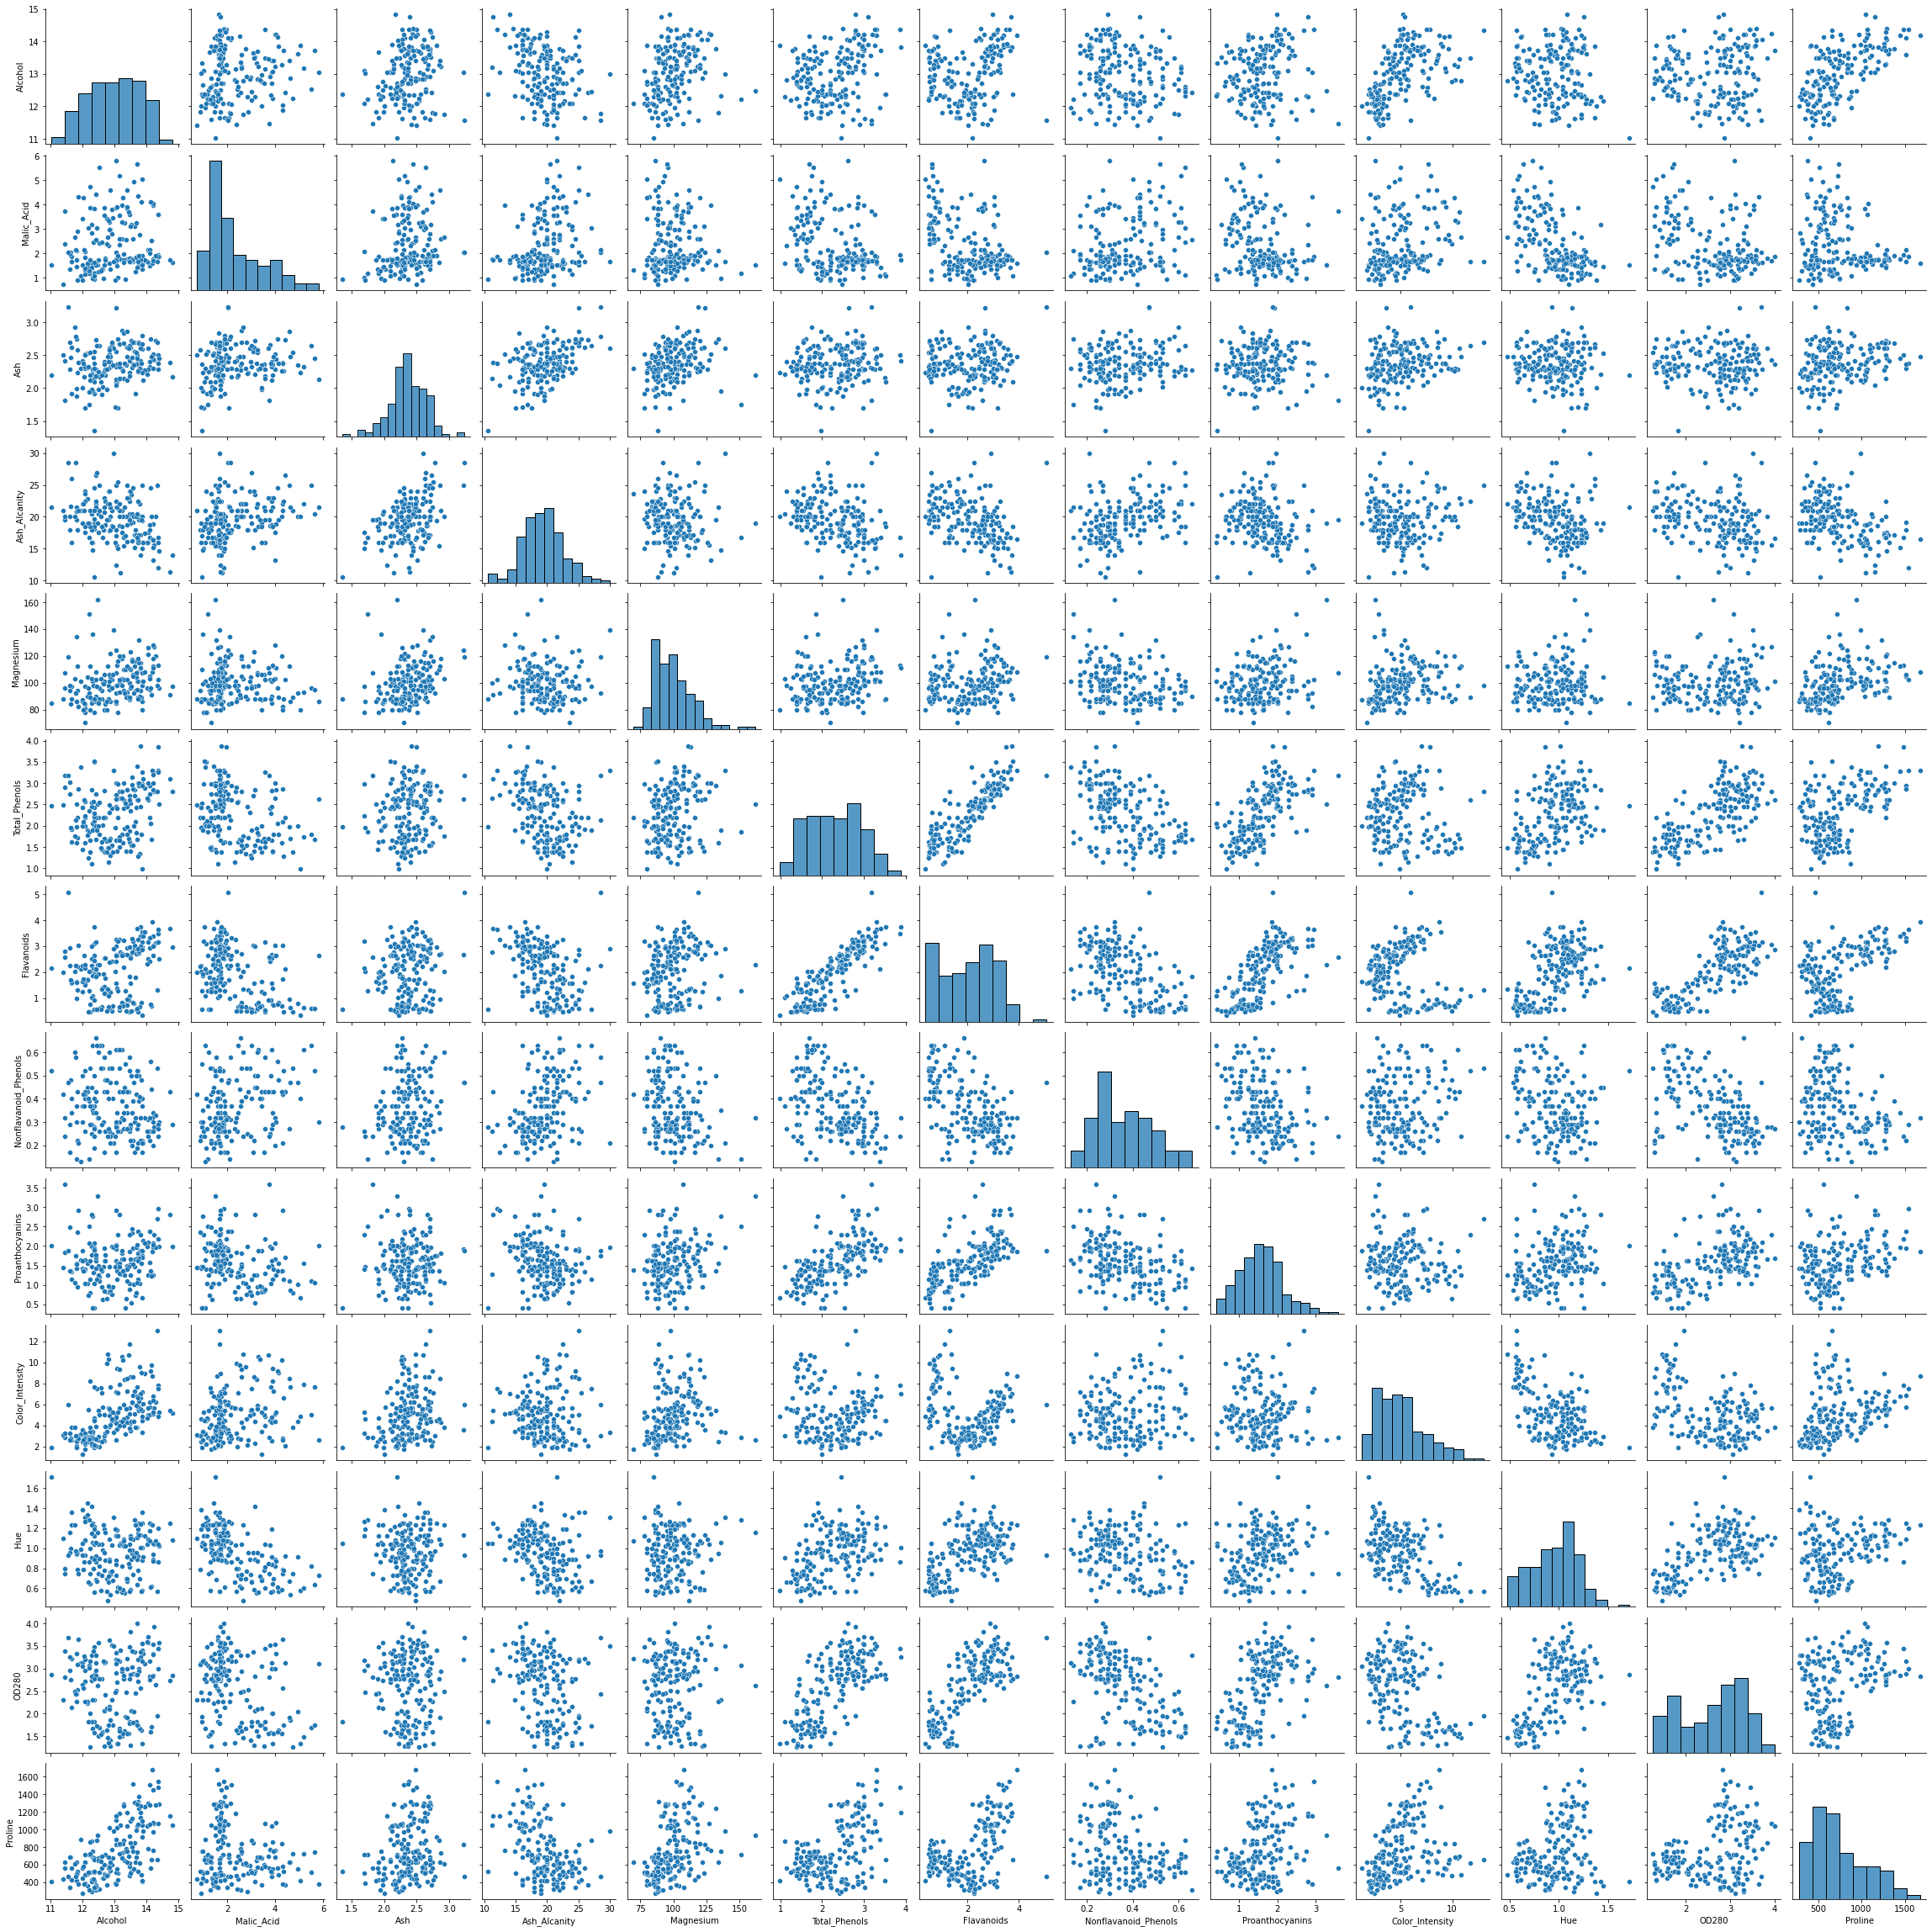

In [9]:
sns.pairplot(df)

**Findings:**
* Even though pair plots are not used for higher dimensions like this, we certainly can see a cluster based positioning of datapoints.
* Hence, we proceed to KMeans clustering on this dataset.

### 2.1 KMeans Clustering on Wine Dataset

In [10]:
#random trial with clusters = 3
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(df)
labels = kmeans_model.predict(df)
print(labels)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 2 1 2 2 1 1 1 2 2 0
 1 2 2 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 2 1 1 2 1 2 1 2 2 2 1 2 2 2 2 1 2
 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1
 1 2 2 2 2 1 1 1 2 1 1 1 2 1 2 1 1 2 1 1 1 1 2 2 1 1 1 1 1 2]


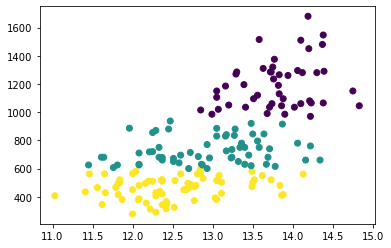

In [11]:
#printing scatter plot to show the cluster groups
plt.scatter(x=df['Alcohol'],y=df['Proline'],c=labels)

**Findings:**
* We get the hint that there are three different clusters as per the n_clusters we provided.
* If n_clusters is given different, it will increase or decrease as per the number.

In [12]:
test = [[14.43,1.77,2.42,13.6,99,2.7,2.56,0.4,1.86,5.26,1.22,3.78,1320]]
new_labels = kmeans_model.predict(test)
print(new_labels)

[0]


* predicts the label as 1 which was created in the n_clusters (0,1,2)
* However, now we find the optimum number of clusters using Elbow Method.

#### Finding the Inertia for the model
* We use it to find the optimum number of clusters for the model
* Inertia is ideally low for good model

In [13]:
kmeans_model.inertia_ #this is too high 

2370689.686782968

### 3.1 Finding the Optimum Cluster No. using Elbow Method

In [14]:
#calculating WCSS (within-cluster sums of squares) 

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS Value')

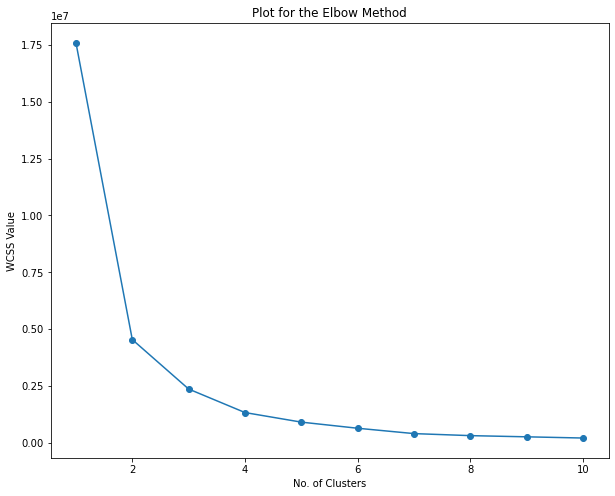

In [15]:
#plotting wcss to find the elbow 

plt.figure(figsize=(10,8))
plt.plot(range(1, 11), wcss,'-o')
plt.title('Plot for the Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS Value' )

In [16]:
#executing K-Means Model

kmeans = KMeans(n_clusters=5,init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df)

In [17]:
y_kmeans

array([4, 4, 4, 1, 0, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 0, 0, 0,
       4, 4, 0, 0, 4, 1, 0, 4, 1, 1, 4, 1, 4, 0, 0, 4, 4, 0, 0, 4, 4, 3,
       0, 4, 4, 4, 4, 1, 4, 1, 4, 1, 4, 4, 4, 1, 1, 2, 3, 2, 3, 2, 2, 3,
       2, 2, 0, 3, 0, 2, 2, 4, 0, 2, 2, 2, 0, 2, 2, 3, 3, 2, 2, 2, 2, 3,
       3, 3, 2, 2, 2, 2, 2, 0, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3,
       3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 2, 3, 0, 0, 2, 3, 3, 3, 2, 2, 2, 3,
       3, 3, 2, 0, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 0, 3, 2, 2, 3, 0, 0, 0,
       0, 3])

In [18]:
#we see 0,1,2,3,4 - total five clusters 

In [19]:
X = df.values #converting df to np array

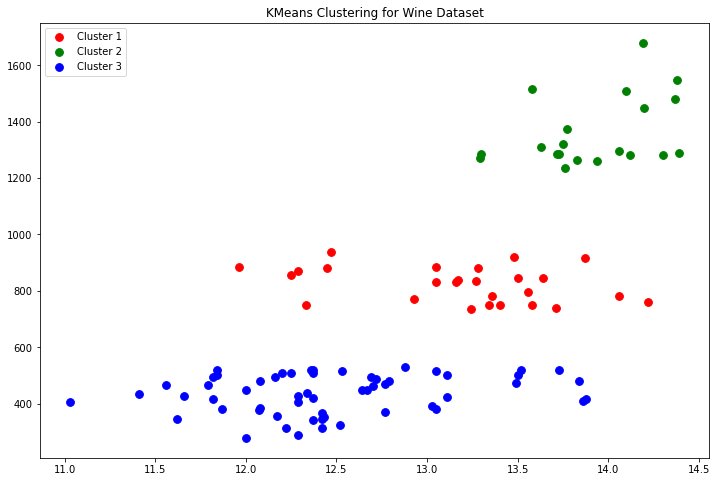

In [20]:
plt.figure(figsize=(12,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans  == 0, 12], s = 60, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans  == 1, 0], X[y_kmeans  == 1, 12], s = 60, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_kmeans  == 2, 0], X[y_kmeans  == 2, 12], s = 60, c = 'blue', label = 'Cluster 3')

plt.title('KMeans Clustering for Wine Dataset')
plt.legend()
plt.show()

In [21]:
kmeans.inertia_ #inertia is lower now 

916379.1871539169

#### PCA to reduce the number of features from 13 to something lower

In [22]:
df.shape #shape before PCA 

(178, 13)

In [23]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [24]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(df)
scaled_data = pd.DataFrame(scaled_data, columns = df.columns)
scaled_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.247442e-18,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [25]:
#Performing PCA on the scaled data

from sklearn.decomposition import PCA

pca = PCA(n_components = 3) #we reduce the features to 3
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(178, 3)

In [26]:
#displaying the PCA components
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592]])

In [27]:
#executing K-Means Model with PCA df

kmeans2 = KMeans(n_clusters=5,init = 'k-means++', random_state = 42)
y_kmeans2 = kmeans2.fit_predict(x_pca)

In [28]:
kmeans2.inertia_

370.6931737361403

#### Silhouette Score for KMeans Clustering

In [29]:
from sklearn.metrics import silhouette_score

In [44]:
#silhouette score for kmeans without dim reduction
kmeans_savg1 = silhouette_score(X,y_kmeans)
print(kmeans_savg1)

0.5489993239795681


In [46]:
#silhouette score for kmeans with dim reduction using pca
kmeans_savg2 = silhouette_score(x_pca,y_kmeans2)
print(kmeans_savg2)

0.379668834541928


**Findings:**
* The inertia value for this model after doing Standard Scaling and PCA has reduced significantly.
* Silhouette Score is 0.549 for KMeans without any dimensionality reduction.

### 2.2 Hierarchical Clustering (Agglomerative Hierarchical Clustering)

#### A. With Scaling (Normalization)

In [31]:
#we first normalize the data 
from sklearn.preprocessing import Normalizer
norm = Normalizer()
norm_df = norm.fit_transform(df)

### 3.2 Dendogram to find the Optimum Clusters

In [32]:
#Dendogram calculation and plotting 
import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Euclidean Distances')

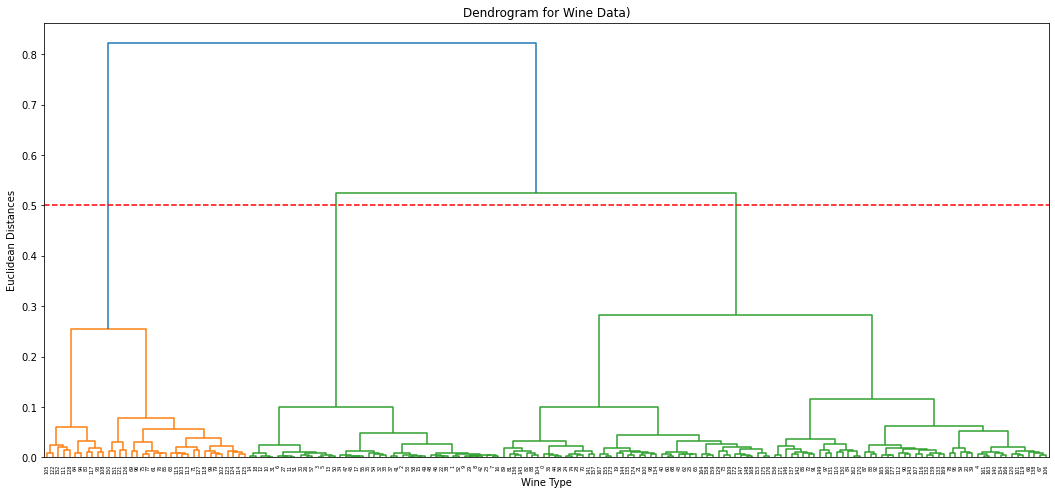

In [33]:
#Decide the number of clusters by using this dendrogram
plt.figure(figsize=(18,8))
dendo = sch.dendrogram(sch.linkage(norm_df, method = 'ward'))
plt.hlines(0.5,0,5000,colors='r',linestyles='--')
plt.title('Dendrogram for Wine Data)')
plt.xlabel('Wine Type')
plt.ylabel('Euclidean Distances')

In [34]:
from sklearn.cluster import AgglomerativeClustering #importing AHC

In [35]:
#instantiating AHC model
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward') 
#3 clusters as three cutting points in the dendogram

y_hc = hc.fit_predict(norm_df)

In [36]:
y_hc

array([0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

#### Plotting the Clusters of Agglomerative HC

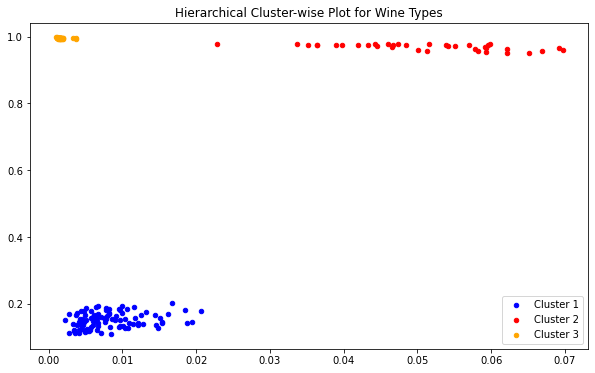

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(norm_df[y_hc == 0, 9], norm_df[y_hc == 0, 4], s = 20, c = 'blue', label = 'Cluster 1')
plt.scatter(norm_df[y_hc == 1, 3], norm_df[y_hc == 1, 12], s = 20, c = 'red', label = 'Cluster 2')
plt.scatter(norm_df[y_hc == 2, 1], norm_df[y_hc == 2, 12], s = 20, c = 'orange', label = 'Cluster 3')
plt.title('Hierarchical Cluster-wise Plot for Wine Types')
plt.legend()

#### B. With PCA

Text(0, 0.5, 'Euclidean Distances')

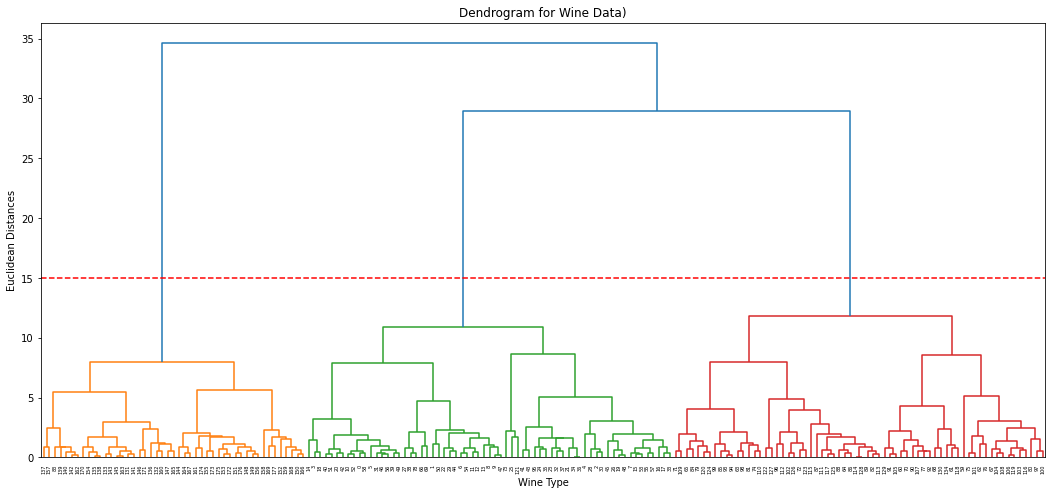

In [38]:
#Decide the number of clusters by using this dendrogram
plt.figure(figsize=(18,8))
dendo2 = sch.dendrogram(sch.linkage(x_pca, method = 'ward'))
plt.hlines(15,0,5000,colors='r',linestyles='--')
plt.title('Dendrogram for Wine Data)')
plt.xlabel('Wine Type')
plt.ylabel('Euclidean Distances')

In [39]:
#instantiating AHC model
hc2 = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward') 
#3 clusters as three cutting points in the dendogram

y_hc2 = hc.fit_predict(x_pca)

In [40]:
y_hc2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

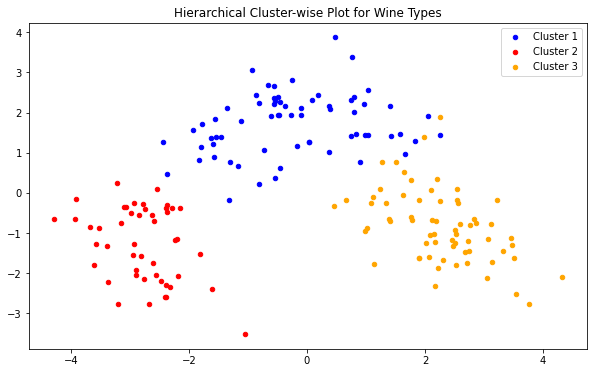

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(x_pca[y_hc2 == 0,0], x_pca[y_hc2 == 0,1], s = 20, c = 'blue', label = 'Cluster 1')
plt.scatter(x_pca[y_hc2 == 1, 0], x_pca[y_hc2 == 1, 1], s = 20, c = 'red', label = 'Cluster 2')
plt.scatter(x_pca[y_hc2 == 2, 0], x_pca[y_hc2 == 2, 1], s = 20, c = 'orange', label = 'Cluster 3')
plt.title('Hierarchical Cluster-wise Plot for Wine Types')
plt.legend()

#### Silhouette Score for Agglomerative Clustering

In [47]:
#silhouette score for ahc without dim reduction
ahc_savg1 = silhouette_score(norm_df,y_hc)
print(ahc_savg1)

0.5035575391761311


In [48]:
#silhouette score for ahc with pca
ahc_savg2 = silhouette_score(x_pca,y_hc2)
print(ahc_savg2)

0.4459492198062967


**Findings:**
* There seem to be a better clustering with plot 2 compared to plot 1.
* Silhouette score is .504 for AHC using normalized data.

##### Conclusion:
* KMeans Clustering is found to give a better Silhoette score of 55% as compared to 50% with AHC.

In [42]:
#Submitted by Sujith Narayanan
#DSA_B3 - 2021 October Batch

<h2><center>- END OF CASE STUDY -